<a href="https://colab.research.google.com/github/mattmangiacapre/ds1002-bvm5mj/blob/main/Lab-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1: Python

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. Bankman-Fried was recently found guilty on seven counts of fraud and conspiracy.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code. Point assignments are indicated for each section. There are 15 total points possible for this lab, which counts as 5% of your overall grade. There is a 1-point extra credit option at the end.

Useful reference material:
- [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook.
- [Charts Reference](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/charts-in-colaboratory.ipynb) notebook.
- [Plots Walkthrough](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/plotting-examples.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [386]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data (3 pts)

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [387]:
import pandas as pd

ftx_data = pd.read_csv("https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv",
                       sep = ";") # seperating by semicolan to ensure there are multiple columns

## 2. Get Summary Data (1 pt)

In code, display how many rows and columns are in the raw dataset.

In [388]:
ftx_data.shape

(741, 11)

## 3. Clean and Organize the Data (3 pts)

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`,



In [389]:
# Finding inconsistencies with data before changes
print(ftx_data.isna().sum(), ftx_data.duplicated().sum())

# Modifying inconsistencies
ftx_data = ftx_data.dropna()
ftx_data = ftx_data.drop_duplicates()

# Observing changes in data
print("------------------------")
print(ftx_data.isna().sum(), ftx_data.duplicated().sum())

timeOpen     0
timeClose    0
timeHigh     0
timeLow      0
open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64 14
------------------------
timeOpen     0
timeClose    0
timeHigh     0
timeLow      0
open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64 0


In [390]:
ftx_data = ftx_data.drop(["timeOpen", "timeClose", "timeHigh", "timeLow", "marketCap"], axis = 1) # dropping columns by using axis = 1 method

In [391]:
ftx_data = ftx_data.sort_values(["timestamp"], ascending = True) # sorting data in chronological order

In [392]:
ftx_data["timestamp"] = ftx_data["timestamp"].str.replace("T23:59:59.999Z", "") # making the dates more visually appealing

<ipython-input-392-7edef3cd000f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ftx_data["timestamp"] = ftx_data["timestamp"].str.replace("T23:59:59.999Z", "") # making the dates more visually appealing


In [393]:
ftx_data.reset_index(drop=True, inplace=True) # reset index to make it look cleaner and show the dates descending with respective index values

Now display the first 10 rows of the cleaned dataset.

In [394]:
ftx_data.head(10)

,open,high,low,close,volume,timestamp
0,6.201133,7.007523,6.171834,6.923968,3.104665e+07,2021-01-03
1,6.948680,7.632146,6.358218,7.514079,4.052611e+07,2021-01-04
2,7.528216,8.714947,7.081120,8.664688,4.947928e+07,2021-01-05
3,8.671285,9.390797,8.425946,9.390797,3.140463e+07,2021-01-06
4,9.386493,10.004872,9.215244,9.562131,4.630334e+07,2021-01-07
5,9.569239,9.726429,8.452265,9.380988,4.228627e+07,2021-01-08
6,9.370450,9.636120,8.728044,9.570511,2.849895e+07,2021-01-09
7,9.571917,9.944797,8.657147,9.308809,3.101239e+07,2021-01-10
8,9.298315,9.298315,7.126050,8.610997,1.013024e+08,2021-01-11
9,8.615143,9.097479,8.040916,8.381133,2.674536e+07,2021-01-12


## 4. Calculate Daily Gains/Losses (2 pts)

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Reference code for this is available in the [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook. Hint: It is not complicated and does not require a for-loop.

In [395]:
ftx_data["close_change"] = ftx_data["close"].diff() # not sure if a percent change is wanted, but it says a difference?
ftx_data

,open,high,low,close,volume,timestamp,close_change
0,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03,NaN
1,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04,0.590111
2,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05,1.150608
3,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06,0.726110
4,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07,0.171334
...,...,...,...,...,...,...,...
722,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27,-0.007028
723,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28,-0.037577
724,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29,-0.025860
725,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30,-0.021183


## 5. Identify Growth Days (1 pt)

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [396]:
ftx_data_gains = ftx_data.sort_values(["close_change"], ascending = False) # making the values descending order
ftx_data_gains.reset_index(drop=True, inplace=True) # reset index to make the data look clean
(ftx_data_gains[["close_change", "timestamp"]]).head(10) # showing the first 10

,close_change,timestamp
0,16.677156,2021-09-01
1,9.800320,2021-09-06
2,8.335900,2021-02-19
3,6.333923,2021-05-24
4,5.529699,2021-03-09
5,5.325192,2021-08-09
6,5.239728,2021-09-08
7,4.504385,2021-04-26
8,4.488174,2021-05-05
9,4.401841,2022-02-28


## 6. Calculate the % Rate of Change (2 pts)

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [397]:
ftx_data["rate_of_change(%)"] = (ftx_data["close"].pct_change()) * 100 # multiply by 100 to make the percentage look more readable
ftx_data

,open,high,low,close,volume,timestamp,close_change,rate_of_change(%)
0,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03,NaN,NaN
1,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04,0.590111,8.522727
2,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05,1.150608,15.312701
3,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06,0.726110,8.380101
4,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07,0.171334,1.824484
...,...,...,...,...,...,...,...,...
722,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27,-0.007028,-0.755153
723,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28,-0.037577,-4.068215
724,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29,-0.025860,-2.918404
725,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30,-0.021183,-2.462476


## 7. Identify Greatest % Change Days (1 pt)

Based on the rate change column calculated above, identify the top 5 days of greatest rate changes, whether positive or negative.

Display your results in a table showing both the rate of change and their dates.

In [398]:
ftx_data["absolute_change"] = ftx_data["rate_of_change(%)"].abs() # finding a column of the absolute values of the rate of change
ftx_data_change = ftx_data.sort_values(["absolute_change"], ascending = False) # creating a new data set with percent change descending by magnitude
ftx_data_change.reset_index(drop=True, inplace=True) # reset index to make data look clean
ftx_data_change[["rate_of_change(%)", "timestamp"]].head(5) # showing the correct columns

,rate_of_change(%),timestamp
0,-75.075175,2022-11-08
1,-58.313683,2022-11-09
2,52.868637,2022-11-10
3,34.382542,2021-09-01
4,31.766452,2021-02-19


## 8. Plot the Data (2 pts)

Finally, create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

In [399]:
# Import Libraries

import matplotlib.pyplot as plt

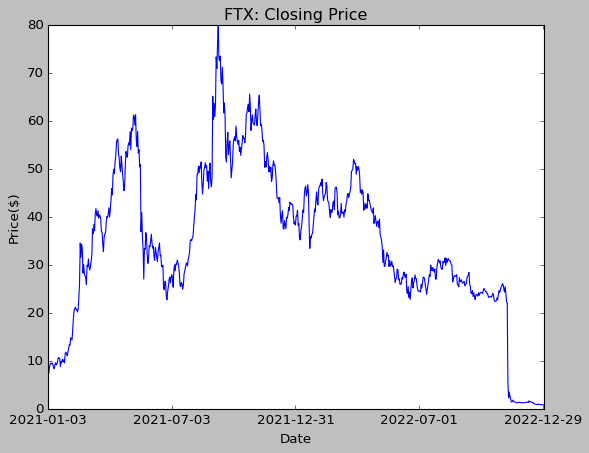

In [400]:
# Closing Prices

plt.plot(ftx_data.timestamp, ftx_data.close)
plt.xlabel("Date")
plt.ylabel("Price($)")
plt.title("FTX: Closing Price")
plt.xticks(ftx_data.timestamp[::181]) # trial and error for the xticks as referenced in the textbook

plt.show()

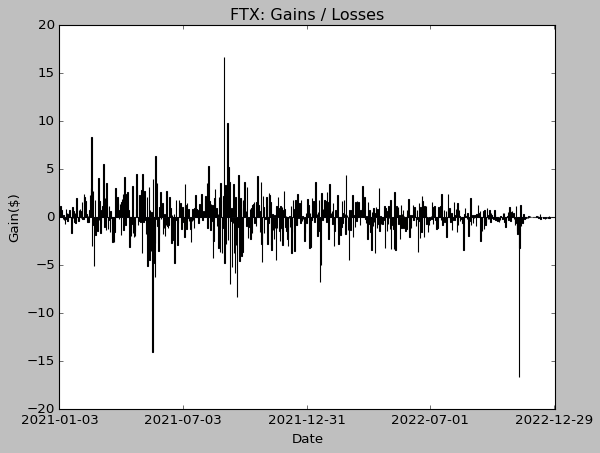

In [401]:
# Daily Gains / Losses

plt.bar(ftx_data.timestamp, ftx_data.close_change)
plt.title("FTX: Gains / Losses")
plt.xlabel("Date")
plt.ylabel("Gain($)")
plt.xticks(ftx_data.timestamp[::181]) # trial and error for the xticks as referenced in the textbook

plt.show()

## BONUS! (1 pt)

Combine the two plots from #8 above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

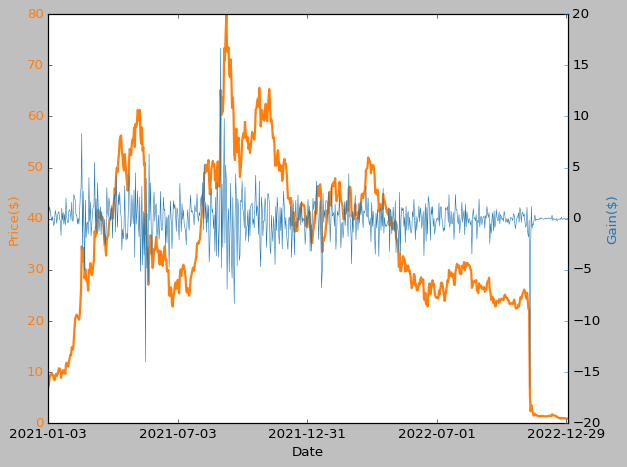

In [402]:
# Both Charts
# With help from the "Charts in Colaboratory"

fig, ax1 = plt.subplots()

color = "tab:orange"
ax1.set_xlabel("Date")
ax1.set_ylabel("Price($)", color=color)
ax1.plot(ftx_data.timestamp, ftx_data.close, color=color, linewidth = 2) # read documentation paremeters to find linewidth!
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel("Gain($)", color=color)
ax2.plot(ftx_data.timestamp, ftx_data.close_change, color=color, linewidth = .5) # read documentation paremeters to find linewidth!
ax2.tick_params(axis='y', color=color)

fig.tight_layout()
plt.xticks(ftx_data.timestamp[::181]) # trial and error for the xticks as referenced in the textbook
plt.show()